**Name - Atharva Gondkar**

**Class - IS2**

**Roll Number - 2176032**

**Enrollment Number - MITU17BTMA0013**


---

**EXPERIMENT #2** 

**DATE: 01-09-2020**

---


#**TITLE : ML II ASSIGNMENT 2**

---


#**AIM**

Perform Image classification using CIFAR-10 dataset.


#**OBJECTIVE**
1. Implement CNN for Image Classification using CIFAR-10 dataset.



**DRIVE LINK** - *https://drive.google.com/drive/u/0/folders/1VFRRP-IpjH_iq-Beojnorny4Rm53uT6E*

  **Notebook, code, pdf, output snapshots have been stored on the above given drive link.*

# **CIFAR10 CNN**

In [ ]:
from tensorflow.keras.datasets import cifar10
from matplotlib import pyplot as plt
from tensorflow import keras
import tensorflow.compat.v2 as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical as tcg
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout

In [ ]:
(xtr,ytr),(xte,yte)=cifar10.load_data()

In [ ]:
xtr.shape

(50000, 32, 32, 3)

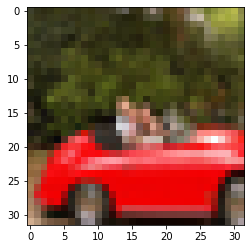

In [ ]:
plt.imshow(xtr[99], cmap='gray')

In [ ]:
ytr[99]

array([1], dtype=uint8)

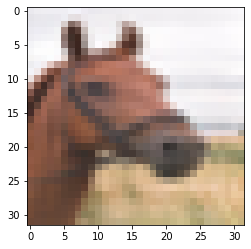

In [ ]:
plt.imshow(xte[99], cmap='gray')

In [ ]:
yte[99]

array([7], dtype=uint8)

In [ ]:
ytr=tcg(ytr)
yte=tcg(yte)

In [ ]:
xte=xte.reshape(xte.shape[0],xte.shape[1],xte.shape[2],3).astype('float32')/255
xtr=xtr.reshape(xtr.shape[0],xtr.shape[1],xtr.shape[2],3).astype('float32')/255

In [ ]:
model=Sequential()
model.add(Conv2D(64,(3,3),input_shape=(32,32,3),activation='relu'))
model.add(Conv2D(32,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.3))

model.add(Conv2D(64,(3,3),activation='relu'))
model.add(Conv2D(32,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Flatten())

model.add(Dense(512,activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(256,activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(10, activation='softmax'))

In [ ]:
model.compile(loss='categorical_crossentropy',optimizer='adam', metrics=['accuracy'])

In [ ]:
history = model.fit(xtr,ytr, validation_data=(xte,yte),epochs=15, batch_size=128)

Epoch 1/15
391/391 [==============================] - 4s 11ms/step - loss: 1.7685 - accuracy: 0.3379 - val_loss: 1.4028 - val_accuracy: 0.4939
Epoch 2/15
391/391 [==============================] - 4s 10ms/step - loss: 1.3900 - accuracy: 0.4971 - val_loss: 1.2225 - val_accuracy: 0.5600
Epoch 3/15
391/391 [==============================] - 4s 11ms/step - loss: 1.2394 - accuracy: 0.5556 - val_loss: 1.0678 - val_accuracy: 0.6236
Epoch 4/15
391/391 [==============================] - 4s 11ms/step - loss: 1.1353 - accuracy: 0.5983 - val_loss: 0.9946 - val_accuracy: 0.6510
Epoch 5/15
391/391 [==============================] - 4s 10ms/step - loss: 1.0434 - accuracy: 0.6315 - val_loss: 0.9380 - val_accuracy: 0.6687
Epoch 6/15
391/391 [==============================] - 4s 11ms/step - loss: 0.9908 - accuracy: 0.6509 - val_loss: 0.8607 - val_accuracy: 0.7007
Epoch 7/15
391/391 [==============================] - 4s 11ms/step - loss: 0.9382 - accuracy: 0.6694 - val_loss: 0.8181 - val_accuracy: 0.7170

In [ ]:
model.evaluate(xtr,ytr)

1563/1563 [==============================] - 4s 3ms/step - loss: 0.5249 - accuracy: 0.8202


[0.5248758792877197, 0.8201599717140198]

In [ ]:
score = model.evaluate(xte,yte)

313/313 [==============================] - 1s 3ms/step - loss: 0.6804 - accuracy: 0.7653


In [ ]:
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.680413544178009
Test accuracy: 0.7652999758720398


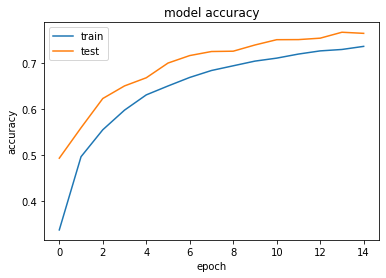

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

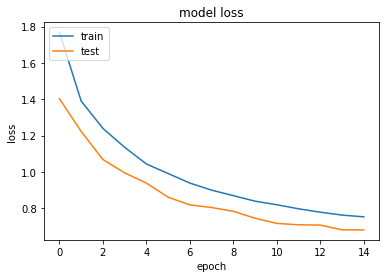

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
model.save("CNN_cifar_10.h5")

In [ ]:
model.load_weights("CNN_cifar.h5")

In [ ]:
loaded_model = tf.keras.models.load_model("CNN_cifar.h5")

loaded_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 30, 30, 64)        1792      
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 28, 28, 32)        18464     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 12, 12, 64)        18496     
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 10, 10, 32)        18464     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 5, 5, 32)         

In [ ]:
np.save('my_history.npy',history.history)